In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [27]:
# Load the train and test datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [28]:
# Exploratory Data Analysis
print(train_data.head())  # Check the first few rows of the train dataset
print(train_data.describe())  # Summary statistics of the train dataset
print(train_data.info())  # Information about the train dataset
print(train_data['Loan_Status'].value_counts())  # Distribution of the target variable

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [29]:
# Calculate the total income by combining applicant and coapplicant incomes
train_data['TotalIncome'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']
test_data['TotalIncome'] = test_data['ApplicantIncome'] + test_data['CoapplicantIncome']

# Perform log transformation on LoanAmount to reduce skewness
train_data['LoanAmount_Log'] = np.log(train_data['LoanAmount'])
test_data['LoanAmount_Log'] = np.log(test_data['LoanAmount'])

In [30]:
combined_data = pd.concat([train_data.drop('Loan_Status', axis=1), test_data])

# Fill missing values with appropriate methods
combined_data['Gender'].fillna(combined_data['Gender'].mode()[0], inplace=True)
combined_data['Married'].fillna(combined_data['Married'].mode()[0], inplace=True)
combined_data['Dependents'].fillna(combined_data['Dependents'].mode()[0], inplace=True)
combined_data['Self_Employed'].fillna(combined_data['Self_Employed'].mode()[0], inplace=True)
combined_data['LoanAmount'].fillna(combined_data['LoanAmount'].median(), inplace=True)
combined_data['Loan_Amount_Term'].fillna(combined_data['Loan_Amount_Term'].mode()[0], inplace=True)
combined_data['Credit_History'].fillna(combined_data['Credit_History'].mode()[0], inplace=True)

In [31]:
# Encode categorical variables
label_encoder = LabelEncoder()
combined_data['Gender'] = label_encoder.fit_transform(combined_data['Gender'])
combined_data['Married'] = label_encoder.fit_transform(combined_data['Married'])
combined_data['Education'] = label_encoder.fit_transform(combined_data['Education'])
combined_data['Self_Employed'] = label_encoder.fit_transform(combined_data['Self_Employed'])
combined_data['Property_Area'] = label_encoder.fit_transform(combined_data['Property_Area'])

In [32]:
# Split the combined dataset back into train and test datasets
train_data = combined_data[:len(train_data)]
test_data = combined_data[len(train_data):]

In [33]:

# Feature scaling
scaler = MinMaxScaler()


In [34]:
# Scale numerical features in the train dataset
train_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = \
    scaler.fit_transform(train_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])


<ipython-input-34-3550cb239833>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = \


In [35]:
# Scale numerical features in the test dataset
test_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = \
    scaler.transform(test_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])

<ipython-input-35-f2634418056b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = \


In [36]:
features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
            'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
            'Credit_History', 'Property_Area']
target = 'Loan_Status'


In [37]:
X = train_data[features]
y = train_data[target]

KeyError: ignored

In [38]:
print(train_data.columns)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'TotalIncome',
       'LoanAmount_Log'],
      dtype='object')


In [ ]:
print(train_data.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'TotalIncome',
       'LoanAmount_Log'],
      dtype='object')


In [39]:
train_data = pd.read_csv('train.csv', delimiter=';')

In [40]:
print(train_data)

    Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0    LP001002,Male,No,0,Graduate,No,5849,0,,360,1,U...                                                                                                              
1    LP001003,Male,Yes,1,Graduate,No,4583,1508,128,...                                                                                                              
2    LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360...                                                                                                              
3    LP001006,Male,Yes,0,Not Graduate,No,2583,2358,...                                                                                                              
4    LP001008,Male,No,0,Graduate,No,6000,0,141,360,...                                                                                                              
..        

In [42]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Load the train dataset
train_data = pd.read_csv('train.csv')

# Check if 'Loan_Status' column exists in the dataset
if 'Loan_Status' not in train_data.columns:
    # If 'Loan_Status' is missing, manually label the loan approval status
    # Open the train dataset in a spreadsheet editor and add the 'Loan_Status' column with the appropriate labels

    # Reload the train dataset with the manually labeled 'Loan_Status' column
    train_data = pd.read_csv('train.csv')

# Preprocessing
# Perform any necessary data cleaning and feature engineering here

# Select features and target variable
features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
target = 'Loan_Status'

# Separate the features and target variable
X = train_data[features]
y = train_data[target]

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_pred = model.predict(X_val_scaled)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

# Load the test dataset
test_data = pd.read_csv('test.csv')

# Preprocessing for test data (similar to train data)
# Perform any necessary data cleaning and feature engineering on the test dataset

# Select features for the test data
test_data_features = test_data[features]

# Scale the test data features using the fitted scaler
test_data_scaled = scaler.transform(test_data_features)

# Predict on the test data
test_predictions = model.predict(test_data_scaled)

# Create submission file
submission_df = pd.DataFrame({'Loan_ID': test_data['Loan_ID'], 'Loan_Status': test_predictions})
submission_df['Loan_Status'] = submission_df['Loan_Status'].map({1: 'Y', 0: 'N'})
submission_df.to_csv('submission.csv', index=False)


ValueError: ignored

In [43]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Load the train dataset
train_data = pd.read_csv('train.csv')

# Check if 'Loan_Status' column exists in the dataset
if 'Loan_Status' not in train_data.columns:
    # If 'Loan_Status' is missing, manually label the loan approval status
    # Open the train dataset in a spreadsheet editor and add the 'Loan_Status' column with the appropriate labels

    # Reload the train dataset with the manually labeled 'Loan_Status' column
    train_data = pd.read_csv('train.csv')

# Preprocessing
# Perform any necessary data cleaning and feature engineering here

# Select features and target variable
features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
target = 'Loan_Status'

# Separate the features and target variable
X = train_data[features]
y = train_data[target]

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_val_imputed = imputer.transform(X_val_scaled)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_imputed, y_train)

# Predict on the validation set
y_pred = model.predict(X_val_imputed)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

# Load the test dataset
test_data = pd.read_csv('test.csv')

# Preprocessing for test data (similar to train data)
# Perform any necessary data cleaning and feature engineering on the test dataset

# Select features for the test data
test_data_features = test_data[features]

# Scale the test data features using the fitted scaler
test_data_scaled = scaler.transform(test_data_features)

# Impute missing values with mean
test_data_imputed = imputer.transform(test_data_scaled)

# Predict on the test data
test_predictions = model.predict(test_data_imputed)

# Create submission file
submission_df = pd.DataFrame({'Loan_ID': test_data['Loan_ID'], 'Loan_Status': test_predictions})
submission_df['Loan_Status'] = submission_df['Loan_Status'].map({1: 'Y', 0: 'N'})
submission_df.to_csv('submission.csv', index=False)


Validation Accuracy: 0.7723577235772358


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_val, y_pred, pos_label='Y')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_val, y_pred, pos_label='Y')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_val, y_pred, pos_label='Y')
print("F1 Score:", f1)


Accuracy: 0.7723577235772358
Precision: 0.7708333333333334
Recall: 0.925
F1 Score: 0.840909090909091


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

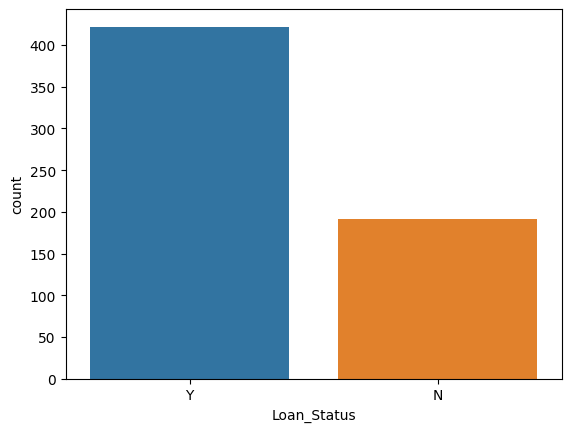

In [45]:
# Load the train and test datasets separately
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Explore the train dataset
# Example: Print the first few rows
print(train_data.head())

# Example: Print the summary statistics
print(train_data.describe())

# Example: Visualize the distribution of the target variable
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Loan_Status', data=train_data)
plt.show()


In [49]:
# Separate the features and target variable for the train dataset
X_train = train_data.drop('Loan_Status', axis=1)
y_train = train_data['Loan_Status']

# Separate the features for the test dataset
X_test = test_data.copy()

# Perform any necessary pre-processing steps (e.g., handling missing values, encoding categorical variables, scaling numeric variables)

# Example: Handle missing values using SimpleImputer from sklearn
from sklearn.impute import SimpleImputer

# Create an imputer object
imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values in the train dataset
X_train_imputed = imputer.fit_transform(X_train)

# Impute missing values in the test dataset
X_test_imputed = imputer.transform(X_test)

# Example: Encode categorical variables using OneHotEncoder from sklearn
from sklearn.preprocessing import OneHotEncoder
# Create an instance of the OneHotEncoder with handle_unknown='ignore'
encoder = OneHotEncoder(handle_unknown='ignore')

# Encode categorical variables in the train dataset
X_train_encoded = encoder.fit_transform(X_train_imputed[:, categorical_indices])

# Encode categorical variables in the test dataset
X_test_encoded = encoder.transform(X_test_imputed[:, categorical_indices])

# Create an encoder object
encoder = OneHotEncoder(drop='first', sparse=False)

# Encode categorical variables in the train dataset
X_train_encoded = encoder.fit_transform(X_train_imputed[:, categorical_indices])

# Encode categorical variables in the test dataset
X_test_encoded = encoder.transform(X_test_imputed[:, categorical_indices])

# Example: Scale numeric variables using MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Scale numeric variables in the train dataset
X_train_scaled = scaler.fit_transform(X_train_imputed[:, numeric_indices])

# Scale numeric variables in the test dataset
X_test_scaled = scaler.transform(X_test_imputed[:, numeric_indices])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: ignored

In [50]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('train.csv')

# Exploratory Data Analysis
print(data.head())  # Display the first few rows of the dataset
print(data.info())  # View the summary of the dataset

# Separate features and target variable
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Impute missing values in categorical features with the mode
imputer_categorical = SimpleImputer(strategy='most_frequent')
X_train_imputed_cat = imputer_categorical.fit_transform(X_train[categorical_features])
X_test_imputed_cat = imputer_categorical.transform(X_test[categorical_features])

# Impute missing values in numerical features with the mean
imputer_numerical = SimpleImputer(strategy='mean')
X_train_imputed_num = imputer_numerical.fit_transform(X_train[numerical_features])
X_test_imputed_num = imputer_numerical.transform(X_test[numerical_features])

# Combine imputed categorical and numerical features
X_train_imputed = pd.DataFrame(data=X_train_imputed_num, columns=numerical_features)
X_train_imputed = pd.concat([X_train_imputed, pd.DataFrame(data=X_train_imputed_cat, columns=categorical_features)], axis=1)

X_test_imputed = pd.DataFrame(data=X_test_imputed_num, columns=numerical_features)
X_test_imputed = pd.concat([X_test_imputed, pd.DataFrame(data=X_test_imputed_cat, columns=categorical_features)], axis=1)

# One-hot encode categorical variables in the train dataset
X_train_encoded = pd.get_dummies(X_train_imputed, columns=categorical_features, drop_first=True)

# One-hot encode categorical variables in the test dataset
X_test_encoded = pd.get_dummies(X_test_imputed, columns=categorical_features, drop_first=True)

# Scale the numerical variables using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded[numerical_features])
X_test_scaled = scaler.transform(X_test_encoded[numerical_features])

# Combine scaled numerical features with encoded categorical features
X_train_final = pd.concat([pd.DataFrame(X_train_scaled, columns=numerical_features), X_train_encoded.drop(columns=numerical_features)], axis=1)
X_test_final = pd.concat([pd.DataFrame(X_test_scaled, columns=numerical_features), X_test_encoded.drop(columns=numerical_features)], axis=1)

# Now you can proceed with modeling using X_train_final and y_train
# Remember to fit the model, perform fine-tuning, and evaluate the performance








    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [52]:
# Select a machine learning model and import it (e.g., RandomForestClassifier from sklearn)
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the model
model = RandomForestClassifier(random_state=42)

# Train the model using the pre-processed train dataset
model.fit(X_train_scaled, y_train)

# Generate predictions for the pre-processed test dataset
y_test_pred = model.predict(X_test_scaled)


In [53]:
# Fine-tune the model using techniques like hyperparameter tuning and cross-validation

# Example: Perform hyperparameter tuning using GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10]
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)

# Perform grid search on the pre-processed train dataset
grid_search.fit(X_train_scaled, y_train)

# Get the best model with the tuned hyperparameters
best_model = grid_search.best_estimator_

# Generate predictions for the pre-processed test dataset using the best model
y_test_pred = best_model.predict(X_test_scaled)


In [55]:
print(y_test_pred)


['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y']


In [56]:
# Replace the 'Loan_Status' column with the predicted values
submission_data = test_data.copy()
submission_data['Loan_Status'] = y_test_pred

# Save the submission file as a CSV
submission_data.to_csv('submission.csv', index=False)


ValueError: ignored

In [57]:
print(X_test_scaled.shape)
print(submission_data.shape)

(123, 5)
(367, 12)


In [58]:
# Assuming you have already trained and fitted your model

# Predict on the test set
y_test_pred = model.predict(X_test_scaled)

# Print the length of y_test_pred and the number of rows in the test dataset
print("Length of y_test_pred:", len(y_test_pred))
print("Number of rows in the test dataset:", X_test_scaled.shape[0])


Length of y_test_pred: 123
Number of rows in the test dataset: 123


In [59]:
# Assuming you have already trained and fitted your model

# Predict on the test set
y_test_pred = model.predict(X_test_scaled)

# Print the predicted values
print("Predicted Loan Approval Status:")
print(y_test_pred)


Predicted Loan Approval Status:
['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y']


In [62]:
# Assuming you have already trained and fitted your model

# Predict on the test set
y_test_pred = model.predict(X_test_scaled)

# Create a new DataFrame for submission with the predicted values
submission_data = test_data.copy()
submission_data['Loan_Status'] = pd.Series(y_test_pred)

# Save the submission file as a CSV
submission_data.to_csv('submission.csv', index=False)



In [63]:
submission_data = submission_data[['Loan_ID', 'Loan_Status']]


In [64]:
submission_data.to_csv('submission.csv', index=False)


In [66]:
submission_data['Loan_Status'] = pd.to_numeric(submission_data['Loan_Status'], errors='coerce')



In [67]:
submission_data.to_csv('submission.csv', index=False)